# (E7) 1D Toy Regression Task 
In this exercise, you will be given an example of simple 1-D regression task. 
You should be able to replicate the results given here if you have completed (E2)-(E5) correctly.

It would be best if you have a Python IDE (integrated development environment) such as [PyCharm](https://www.jetbrains.com/pycharm/) and [Anaconda](anaconda.com) is installed because they will make your life easier! If not, you may want to work on the assignment using Google Colab. In any cases, what you need to do is 1) to fill in the blanks in .py files; and 2) to import the files (e.g., layer.py, optim.py, model.py, etc) that you have completed for use. Here are some scenarios how you would go about doing the assignment: 

#### Without Google Colab: Python IDE + Anaconda 
If you have a Python IDE and Anaconda installed, you can do one of the following:
- Edit .py files in the IDE. Then, simply open .ipynb file also in the IDE where you can edit and run codes. 
- Your IDE might not support running .ipynb files. However, since you have installed Anaconda, you can just open this notebook using Jupyter Notebook.

In both of these cases, you can simply import .py files in this .ipynb file:
```python
from model import NeuralNetwork
```
 
#### With Google Colab
- Google Colab has an embedded code editor. So, you could simply upload all .py files to Google Colab and edit the files there. Once you upload the files, double click a file that you want to edit. Please **make sure that you download up-to-date files frequently**, otherwise Google Colab might accidentally restart and all your files might be gone.
- If you feel like the above way is cumbersome, you could instead use any online Python editors for completing .py files (e.g., see [repl.it](https://repl.it/languages/python3)). Also, it's not impossible that you edit the files using any text editors, but they don't show you essential Python grammar information, so you'll be prone to make mistakes in that case. Once you are done editing, you can either upload the files to Colab or follow the instruction below. 
 
- If you have *git clone*d the assignment repository to a directory in your Google Drive (or you have the files stored in the Drive anyway), you can do the following:
```jupyterpython
from google.colab import drive
drive.mount('/content/drive/')          # this will direct you to a link where you can get an authorization key
import sys
sys.path.append('/content/drive/My Drive/your-directory-where-the-python-files-exist')
```
Then, you are good to go. When you change a .py file, make sure it is synced to the drive, then you need to re-run the above lines to get access to the latest version of the file. Note that you should give correct path to *sys.path.append* method.

Now, let's get started!

## Target Function
Here's a 1-dimensional nonlinear function that you want to predict, which is generated by the code below.<br>

In [1]:
from model import NeuralNetwork

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

def regression(N=2000):
    np.random.seed(1)
    X = 0.5 * np.random.randn(N, 1) + 0.1
    X = 0.75 * X - 0.1

    Y = -(8 * X ** 2 + 0.1 * X + 0.1)
    Y = np.exp(Y) + 0.05 * np.random.randn(N, 1)
    Y /= np.max(np.abs(Y))
    return X, Y

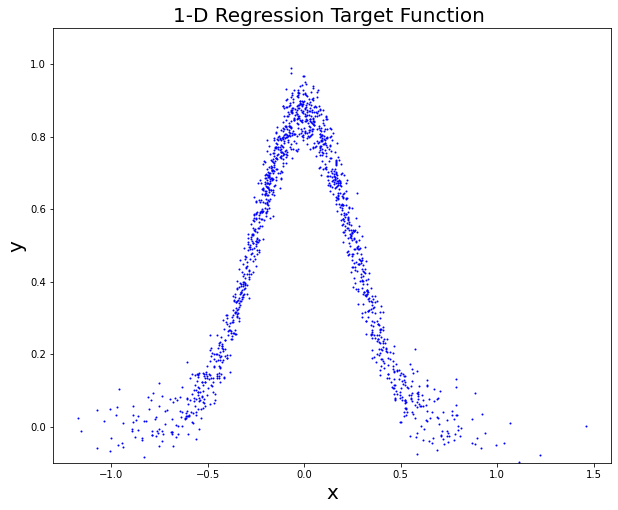

In [3]:
X, Y = regression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_train[:, 0], y_train, 'b.', markersize=2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("1-D Regression Target Function ", fontsize=20)
plt.show()

In [4]:
y_test.shape

(600, 1)

## A Linear Network to Learn the Target Function
Now, we are going to create a linear neural network model.

In [5]:
from model import NeuralNetwork
from layer import FCLayer
from loss import MSELoss
from optim import SGD, Adam, RMSProp

# define a network
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True)) # add a fully connected layer with 16 hidden nodes
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))   # add the output layer which maps hidden nodes to the output

In [6]:
nn.parameters()[0].shape, nn.parameters()[1].shape

((1, 16), (1, 16))

In [7]:
for i in range(0, len(nn.parameters())):
    print(nn.parameters()[i].value, "\n", nn.parameters()[i].shape, "\n", nn.parameters()[i].grad )
    print("..............\n")


[[ 0.41779824 -0.41405014  0.46343258  0.18798492  0.23304152  0.07612848
   0.52242006 -0.29484965  0.34086932 -0.00563378  0.46445866 -0.26591558
  -0.5759725  -0.51698652  0.47483724  0.16771146]] 
 (1, 16) 
 None
..............

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
 (1, 16) 
 None
..............

[[ 0.27360001]
 [ 0.00518248]
 [ 0.06840882]
 [-0.16171745]
 [ 0.33582119]
 [ 0.3052014 ]
 [ 0.2376427 ]
 [ 0.54880997]
 [ 0.31942758]
 [ 0.56785666]
 [ 0.10726441]
 [ 0.14170091]
 [ 0.16521984]
 [-0.20630153]
 [-0.5548442 ]
 [ 0.34240456]] 
 (16, 1) 
 None
..............

[[0.]] 
 (1, 1) 
 None
..............



In [8]:
# Set up loss function
loss = MSELoss()            # use MSE loss as we are doing regression
nn.set_loss(loss)           # link the loss with the network

In [9]:
# Set hyperparameters
lr = 0.001                  # learning rate
batch_size = 32             # mini-batch size
epochs = 300                # number of epochs
freq = epochs // 10         # how often shall we print out test results

In [10]:
# set up optimizer and link to the network
optimizer = Adam(nn.parameters(), lr=lr)      # Adam optimizer
nn.set_optimizer(optimizer)

In [11]:
# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]                        # number of training samples

loss_hist = []                              # list to store loss history

for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]

        # feed forward
        pred = nn.predict(x_batch)

        # Error
        loss += nn.loss(pred, y_batch) * batch_size / N

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.47789	Test RMSE: 0.39976
Epoch 31/300	RMSE=0.30283	Test RMSE: 0.30602
Epoch 61/300	RMSE=0.30328	Test RMSE: 0.30527
Epoch 91/300	RMSE=0.30331	Test RMSE: 0.30602
Epoch 121/300	RMSE=0.30270	Test RMSE: 0.30512
Epoch 151/300	RMSE=0.30352	Test RMSE: 0.30531
Epoch 181/300	RMSE=0.30311	Test RMSE: 0.30511
Epoch 211/300	RMSE=0.30279	Test RMSE: 0.30567
Epoch 241/300	RMSE=0.30283	Test RMSE: 0.30592
Epoch 271/300	RMSE=0.30299	Test RMSE: 0.30521

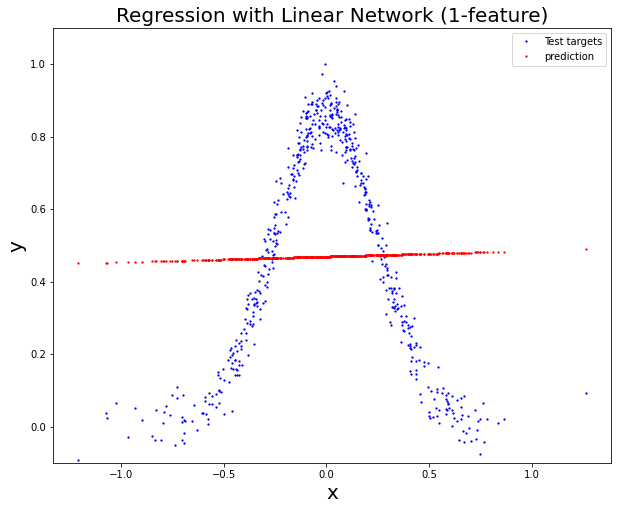

In [12]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(1), fontsize=20)
plt.show()


In [14]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # plt.plot(total_loss_hist) # Plot list. x-values assumed to be [0, 1, 2, 3]
# plt.title("Loss history")
# plt.show() 

### Linear Network with Feature Augmented
Clearly, the linear network is not capable of learning the nonlinear function. However, we can actually do at least better than this by augmenting some features to X. For example, we can use the following function to add polynomials of X as features.

In [15]:
def augment_feature(x, n):
    # augment n polynomials of x
    if n < 2:
        return x
    temp_x = x.copy()
    for i in range(2, n+1):
        x_poly = np.power(temp_x, i)        # 'i'th polynomial of x
        x = np.hstack((x, x_poly))
    return x

Now, let's add X^2 to X and learn a linear network again.

In [16]:
feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []
for epoch in range(epochs):
    # randomly shuffle the training data at the beginning of each epoch
    inds = np.random.permutation(inds)
    x_train = x_train[inds]
    y_train = y_train[inds]

    loss = 0
    for b in range(0, N, batch_size):
        # get the mini-batch
        x_batch = x_train[b: b + batch_size]
        y_batch = y_train[b: b + batch_size]
        total_y_batches.append(y_batch)

        # feed forward
        pred = nn.predict(x_batch)
        total_pred_hist.append(pred)

        # Error
        
        loss += nn.loss(pred, y_batch) * batch_size / N
        #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N
        
        total_loss_hist.append(loss)
#         print(loss)

        # Back propagation of errors
        nn.backward(pred, y_batch)

        # Update parameters
        nn.optimizer.step()

    # record loss per epoch
    loss_hist.append(loss)

    if epoch % freq == 0:
        print()
        print("Epoch %d/%d\tRMSE=%.5f" % (epoch + 1, epochs, np.sqrt(loss)), end='\t', flush=True)

        # Test error
        pred = nn.predict(x_test, mode=False)
        rmse = np.sqrt(nn.loss(pred, y_test))
        print("Test RMSE: {:.5f}".format(rmse), end='')


Epoch 1/300	RMSE=0.43786	Test RMSE: 0.30530
Epoch 31/300	RMSE=0.19150	Test RMSE: 0.19101
Epoch 61/300	RMSE=0.19141	Test RMSE: 0.19064
Epoch 91/300	RMSE=0.19199	Test RMSE: 0.19073
Epoch 121/300	RMSE=0.19145	Test RMSE: 0.19084
Epoch 151/300	RMSE=0.19150	Test RMSE: 0.19070
Epoch 181/300	RMSE=0.19137	Test RMSE: 0.19083
Epoch 211/300	RMSE=0.19157	Test RMSE: 0.19085
Epoch 241/300	RMSE=0.19167	Test RMSE: 0.19068
Epoch 271/300	RMSE=0.19158	Test RMSE: 0.19076

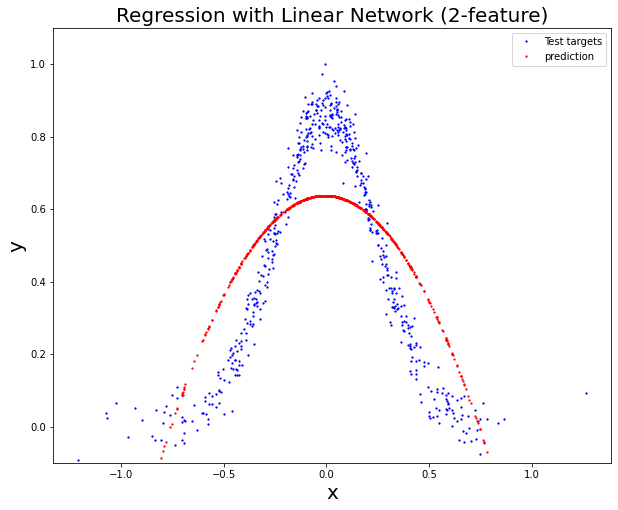

In [17]:
# Plot the prediction
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_test[:, 0], y_test, 'b.', label='Test targets', markersize=2.5)
ax.plot(x_test[:, 0], nn.predict(x_test, mode=False), 'r.', label='prediction', markersize=2.5)
ax.legend(loc='best')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_ylim(-0.1, 1.1)
ax.set_title("Regression with Linear Network ({}-feature)".format(feature_num), fontsize=20)
plt.show()

In [18]:
len(total_pred_hist), len(total_y_batches)
# total_y_batches

(13200, 13200)

In [19]:
total_pred_hist[0][0], total_y_batches[0][0]

(array([-0.43621]), array([0.03570288]))

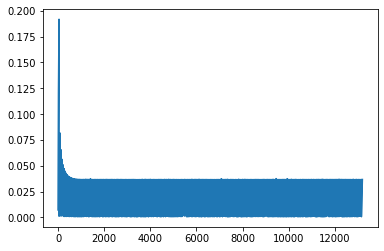

In [20]:
plt.plot(total_loss_hist)

In [21]:
def mse_loss(pred, target):
    ########## (E4) Your code goes here ##########
    loss =np.sum((pred - target)**2) / target.size
    # print("loss from MSE loss:{}".format(loss))
    # print()
    return loss

In [22]:
pred =total_pred_hist[0][0]
target = total_y_batches[0][0]
mse_loss(pred, target)* batch_size / N

0.005090326053809734

In [23]:
nn.total_deltas[i].var()

0.00045460506903570154

Text(0.5, 1.0, 'Variance in deltas per mini batch')

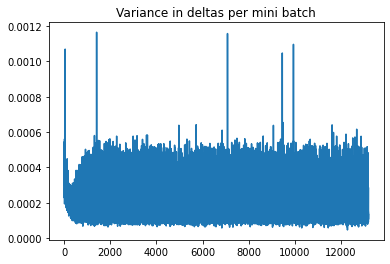

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
variances=[]
for i in range(0, len(nn.total_deltas)):
    variances.append(nn.total_deltas[i].var())

plt.plot(variances)
plt.title("Variance in deltas per mini batch")
#         self.total_preds.append(pred)
#         self.total_targets.append(y_true)

In [25]:
len(nn.layers[1].forward_outputs)

13211

In [26]:
len(nn.layers[1].forward_outputs[0])

32

In [27]:
feature_num = 2
x_train, x_test = augment_feature(x_train, n=feature_num), augment_feature(x_test, n=feature_num)
nn = NeuralNetwork()
nn.add(FCLayer(x_train.shape[1], 16, initialization='xavier', uniform=True))
nn.add(FCLayer(16, 1, initialization='xavier', uniform=True))

loss = MSELoss()
nn.set_loss(loss)

# set hyperparameters
lr = 0.001
batch_size = 32
epochs = 300
freq = epochs // 10

optimizer = SGD(nn.parameters(), lr=lr, momentum=True)
nn.set_optimizer(optimizer)

# Train the model
inds = list(range(x_train.shape[0]))
N = x_train.shape[0]

loss_hist = []
total_loss_hist = []
total_pred_hist = []
total_y_batches = []

inds = np.random.permutation(inds)
x_train = x_train[inds]
y_train = y_train[inds]

loss = 0
for b in range(0, N, batch_size):
    # get the mini-batch
    x_batch = x_train[b: b + batch_size]
    y_batch = y_train[b: b + batch_size]
    total_y_batches.append(y_batch)

    # feed forward
    pred = nn.predict(x_batch)
    total_pred_hist.append(pred)

    # Error
    
    this_loss = nn.loss(pred, y_batch) * batch_size / N
    loss += nn.loss(pred, y_batch) * batch_size / N
    #loss =(np.sum((pred - target)**2) / target.size)* batch_size / N

    total_loss_hist.append(loss)
#         print(loss)

    # Back propagation of errors
    nn.backward(pred, y_batch)

    # Update parameters
    nn.optimizer.step()

In [28]:
nn.optimizer

In [29]:
nn.layers[0].input_data.shape

(24, 4)

In [30]:
print("Shapes for:\n first layer:\n weights:{}, biases:{} \n ...........\n second layer:\n \
weights:{}, biases:{}".format(nn.layers[0].weights.shape, nn.layers[0].bias.shape,\
                                          nn.layers[1].weights.shape, nn.layers[1].bias.shape))

Shapes for:
 first layer:
 weights:(4, 16), biases:(1, 16) 
 ...........
 second layer:
 weights:(16, 1), biases:(1, 1)


In [31]:
nn.layers[1].param[0].shape

(16, 1)

In [32]:
len(pred), len(x_batch), loss

(24, 24, 0.17504606769912584)

In [33]:
nn.layers[0]#         self.backprop_deltas = []
#         self.all_weights = []
#         self.all_weights_grads = []
#         self.all_bias_grads = []

In [34]:
len(nn.layers[0].backprop_deltas)

44

In [35]:
len(nn.layers[0].backprop_deltas[0])

32

In [36]:
nn.layers[0].input_data.shape

(24, 4)

In [37]:
nn.layers[0].weights.value

array([[-0.240893  , -0.52725332,  0.17899116,  0.44797149,  0.21472325,
         0.16549268, -0.39380089, -0.08725216, -0.4272955 , -0.01928423,
        -0.02335691,  0.07483895, -0.03417771,  0.19823648, -0.2396034 ,
        -0.28057519],
       [ 0.51368926,  0.05864937,  0.33626478, -0.0470115 , -0.10014582,
         0.44631424,  0.16043049, -0.31771442,  0.21848256,  0.40643961,
        -0.09744173,  0.5133953 , -0.22317341, -0.36628745, -0.04324027,
         0.10840897],
       [ 0.43931407, -0.02110855, -0.40245847, -0.29075103,  0.16718386,
        -0.54120492,  0.20298868, -0.10892548,  0.07037358, -0.26557996,
        -0.22467099, -0.03029474, -0.49169185, -0.5452441 , -0.13232621,
        -0.22751087],
       [-0.27557004,  0.15835057, -0.03311982, -0.34780845, -0.46150464,
         0.04495611, -0.16747123, -0.05144253,  0.16150566,  0.06587853,
         0.01187728,  0.35643099,  0.13756156,  0.48788671,  0.21914797,
         0.00469815]])

In [ ]:
len(nn.layers[0].forward_outputs[0][0])

In [ ]:
nn.layers[0].all_weights[0] - nn.layers[0].all_weights[3]

In [ ]:
nn.layers[0].all_weights_grads[3]

In [ ]:
nn.optimizer.param_values[0]

In [ ]:
nn.optimizer.param_values[4]

In [ ]:
nn.optimizer.learning_rate

In [ ]:
nn.optimizer.nesterov_descents

In [ ]:
nn.optimizer.descent_updates[0]

In [ ]:
nn.optimizer.descent_updates[4] - nn.optimizer.descent_updates[0]

In [ ]:
len(nn.optimizer.param_values)

In [ ]:
nn.optimizer.sgd_flow

So, the result is better than when we used the single feature. However, it is hard to say that our prediction is good!

## (E7) Your Turn:  Non-linear Neural Network
Without having to bother with feature engineering, you can definitely improve the test performance by, for example, introducing nonlinear activation functions, changing the network architecture, adjusting the learning rate, training more epochs, and (or) using a different optimizer.. So, **it's your turn to try different configurations of the network.** *Experiment with more than 3 configurations of these to get better test performance (test RMSE), and report your trials by summarizing the configurations and performance in a **table**. Additionally, **plot** the test targets and predictions as in the above figures.*


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(total_loss_hist) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.title("Loss history")
plt.show() 

In [ ]:
plt.plot(loss_hist)
plt.title("loss hist")

In [ ]:
plt.plot(total_pred_hist[0])

In [ ]:
len(total_pred_hist)

In [ ]:
for i in range(0,1000):
    plt.plot(total_pred_hist[i])

In [ ]:
nn.total_preds[0][3]

In [ ]:
nn.total_targets[0][3]

In [ ]:
nn.total_deltas[0][3]

In [ ]:
(-0.43621-0.03570288)**2

In [ ]:
nn.total_preds[0][3]-nn.total_targets[0][3]

In [ ]:
len(nn.total_deltas_backward)